In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import thinkstats2
import thinkplot

Data Set: 

In [180]:
import opendatasets as od
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

od.download("https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity/data")

Skipping, found downloaded files in "./anxiety-attack-factors-symptoms-and-severity" (use force=True to force download)


In [6]:
AnxietyFile = pd.read_csv('anxiety_attack_dataset.csv')

Variables to be used:
-Sleep Hours 
-Physical Activity(hr/week)
-Caffeine Intake (mg/day)
-Alcohol Consumption(drinks/week)
-Heart Rate (bpm during attack)

In [354]:
AnxietyFile = AnxietyFile.rename(columns={'Sweating Level (1-5)': 'Sweating', 'Breathing Rate (breaths/min)': 'BreathRate', 'Heart Rate (bpm during attack)': 'HeartRate', 'Sleep Hours': 'SleepHours', 'Physical Activity (hrs/week)': 'PhysicalActivity', 'Caffeine Intake (mg/day)': 'Caffeine', 'Alcohol Consumption (drinks/week)': 'Alcohol', 'Diet Quality (1-10)': 'Diet', 'Severity of Anxiety Attack (1-10)': 'Severity'})

In [72]:
ID = AnxietyFile.ID
Age = AnxietyFile.Age
Sleep = AnxietyFile.SleepHours
Activity = AnxietyFile.PhysicalActivity
Caffeine = AnxietyFile.Caffeine
Alcohol = AnxietyFile.Alcohol
Severity = AnxietyFile.Severity
HeartRate = AnxietyFile.HeartRate

Complete the Histomgram and descriptive characteristics (mean, mode, spread, tails) for each variable 

6.4826500000000005 4.0597622910242706 2.014885180605652


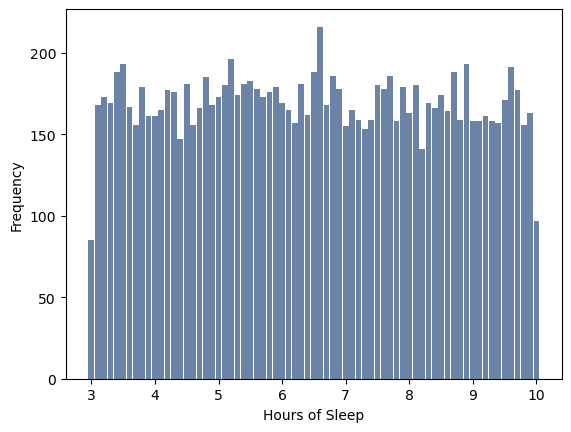

In [12]:
SH_Hist = thinkstats2.Hist(AnxietyFile.SleepHours)
thinkplot.Hist(SH_Hist)
thinkplot.Config(xlabel='Hours of Sleep', ylabel='Frequency')
SH_Mean = Sleep.mean()
SH_Var = Sleep.var()
SH_STD = Sleep.std()
print(SH_Mean, SH_Var, SH_STD)

5.030891666666667 8.346322065102758 2.889000184337612


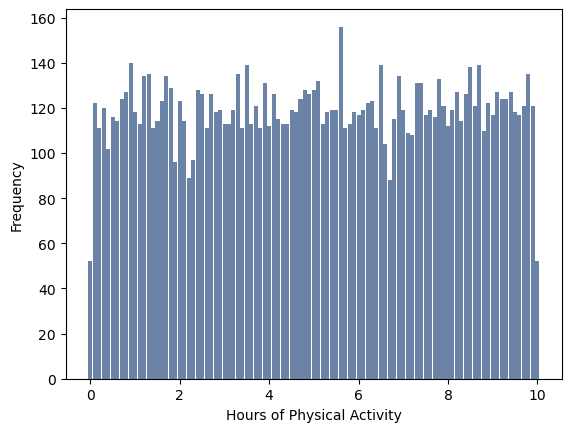

In [13]:
Activity_HS = thinkstats2.Hist(Activity)
thinkplot.Hist(Activity_HS)
thinkplot.Config(xlabel='Hours of Physical Activity', ylabel='Frequency')
Activity_Mean = Activity.mean()
Activity_Var = Activity.var()
Activity_STD = Activity.std()
print(Activity_Mean, Activity_Var, Activity_STD)

246.69608333333332 20876.51376080632 144.4870712583182


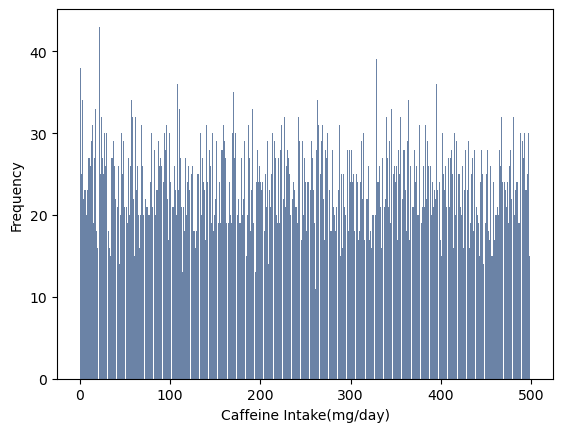

In [14]:
Caffeine_HS = thinkstats2.Hist(Caffeine)
thinkplot.Hist(Caffeine_HS)
thinkplot.Config(xlabel='Caffeine Intake(mg/day)', ylabel='Frequency')
Caffeine_Mean = Caffeine.mean()
Caffeine_Var = Caffeine.var()
Caffeine_STD = Caffeine.std()
print(Caffeine_Mean, Caffeine_Var, Caffeine_STD)

9.492833333333333 33.285555768536845 5.769363549693922


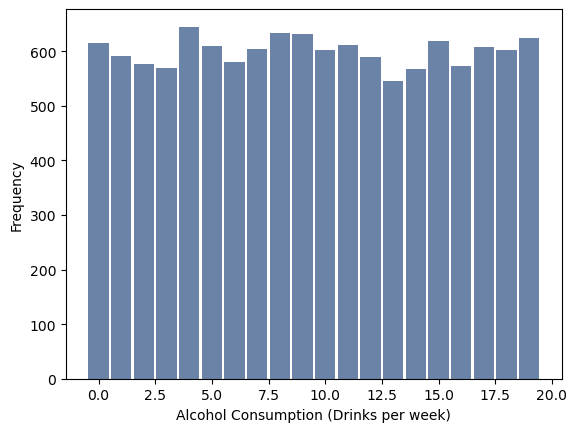

In [15]:
Alcohol_HS = thinkstats2.Hist(Alcohol)
thinkplot.Hist(Alcohol_HS)
thinkplot.Config(xlabel='Alcohol Consumption (Drinks per week)', ylabel='Frequency')
Alcohol_Mean = Alcohol.mean()
Alcohol_Var = Alcohol.var()
Alcohol_STD = Alcohol.std()
print(Alcohol_Mean, Alcohol_Var, Alcohol_STD)

119.3985 1211.507156679731 34.80671137409754


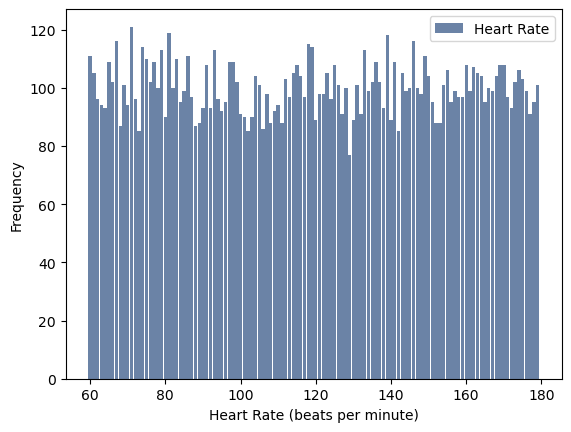

In [102]:
HeartRate_Hist = thinkstats2.Hist(HeartRate, label = 'Heart Rate')
thinkplot.Hist(HeartRate_Hist)
thinkplot.Config(xlabel='Heart Rate (beats per minute)', ylabel='Frequency')
HR_Mean = HeartRate.mean()
HR_Var = HeartRate.var()
HR_STD = HeartRate.std()
print(HR_Mean, HR_Var, HR_STD)

In [17]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/probability.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
import nsfg
import first
import probability

In [254]:
LowSeverity = AnxietyFile[AnxietyFile.Severity <= 5]
HighSeverity = AnxietyFile[AnxietyFile.Severity >= 5]
HighSevHist = thinkstats2.Hist(HighSeverity.HeartRate, label='High Severity')
LowSevHist = thinkstats2.Hist(LowSeverity.HeartRate, label='Low Severity')

In [244]:
Meds = AnxietyFile[AnxietyFile.Medication == 'Yes']
NoMeds = AnxietyFile[AnxietyFile.Medication == 'No']
print(Meds)

          ID  Age  Gender  Occupation  SleepHours  PhysicalActivity  Caffeine  \
3          4   60    Male      Doctor         9.2               3.7       471   
4          5   25    Male     Student         9.2               2.5       364   
5          6   38    Male     Student         6.7               9.9       194   
7          8   36    Male     Teacher         4.9               0.5       413   
10        11   28    Male      Doctor         8.0               3.3       297   
...      ...  ...     ...         ...         ...               ...       ...   
11963  11964   23    Male  Unemployed         7.2               1.5       344   
11970  11971   42    Male       Other         7.6               5.1       348   
11973  11974   36    Male       Other         5.0               0.6       493   
11980  11981   27  Female       Other         9.3               6.6       281   
11999  12000   50    Male     Teacher         6.6               7.8       114   

       Alcohol Smoking Fami

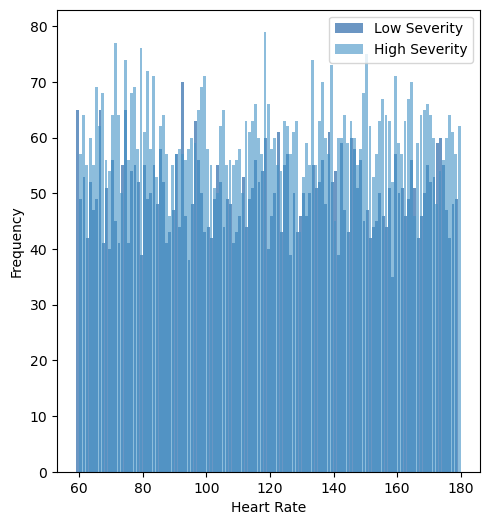

In [258]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(LowSevHist, align='right')
thinkplot.Hist(HighSevHist, align='left')
thinkplot.Config(xlabel='Heart Rate', ylabel='Frequency')

In [250]:
LowSevAlc_pmf = thinkstats2.Pmf(LowSeverity.Alcohol, label = 'Low Severity')
HighSevAlc_pmf = thinkstats2.Pmf(HighSeverity.Alcohol, label = 'High Severity')
LowSevCaf_pmf = thinkstats2.Pmf(LowSeverity.Caffeine, label = 'Low Severity')
HighSevCaf_pmf = thinkstats2.Pmf(HighSeverity.Caffeine, label = 'High Severity')
MedsSev_pmf = thinkstats2.Pmf(Meds.Severity, label = 'Medication Taken')
NoMedsSev_pmf = thinkstats2.Pmf(NoMeds.Severity, label = 'No Medication Taken')

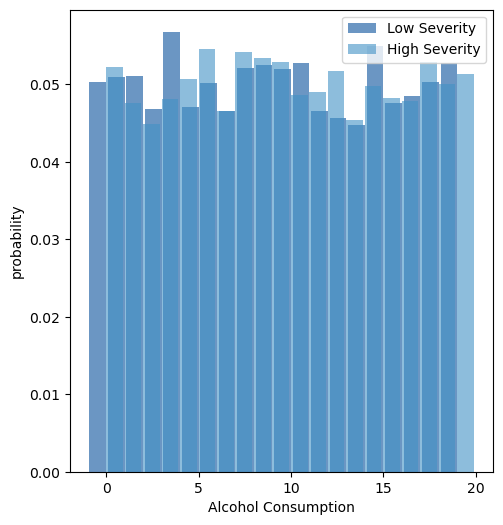

In [21]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(LowSevAlc_pmf, align='right')
thinkplot.Hist(HighSevAlc_pmf, align='left')
thinkplot.Config(xlabel='Alcohol Consumption', ylabel='probability')

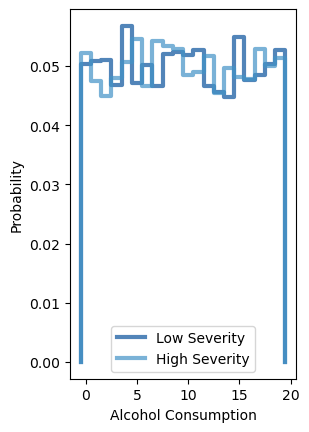

<Figure size 800x600 with 0 Axes>

In [22]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([LowSevAlc_pmf, HighSevAlc_pmf])
thinkplot.Show(xlabel='Alcohol Consumption', ylabel='Probability')

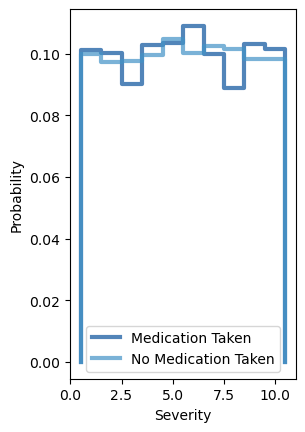

<Figure size 800x600 with 0 Axes>

In [252]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([MedsSev_pmf, NoMedsSev_pmf])
thinkplot.Show(xlabel='Severity', ylabel='Probability')

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [112]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

PercentileRank(AnxietyFile.Alcohol, 6)

34.88333333333333

{'xscale': 'linear', 'yscale': 'linear'}

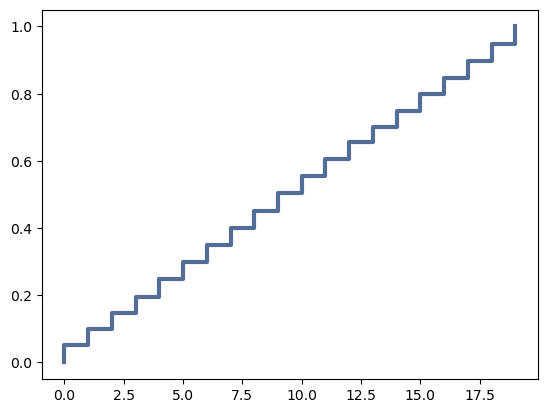

In [116]:
cdf = thinkstats2.Cdf(AnxietyFile.Alcohol, label='Alcohol Consumption')
thinkplot.Cdf(cdf)

In [120]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

EvalCdf(AnxietyFile.Alcohol, 6)

0.34883333333333333

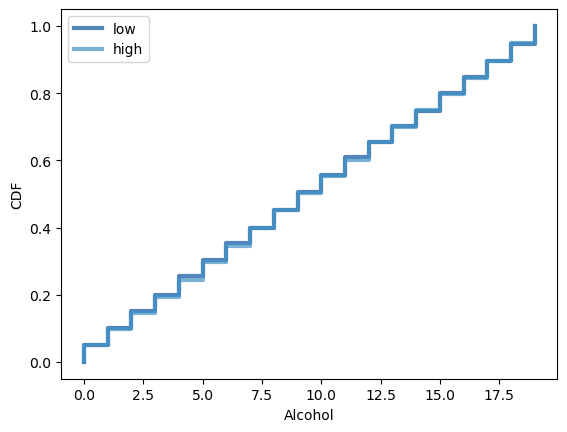

0.30298981125772506
0.29613320489885786


<Figure size 800x600 with 0 Axes>

In [124]:
low_cdf = thinkstats2.Cdf(LowSeverity.Alcohol, label = 'low')
high_cdf = thinkstats2.Cdf(HighSeverity.Alcohol, label = 'high')
thinkplot.PrePlot(2)
thinkplot.Cdfs([low_cdf, high_cdf])
thinkplot.Show(xlabel='Alcohol', ylabel='CDF')

print(EvalCdf(LowSeverity.Alcohol, 5))
print(EvalCdf(HighSeverity.Alcohol, 5))


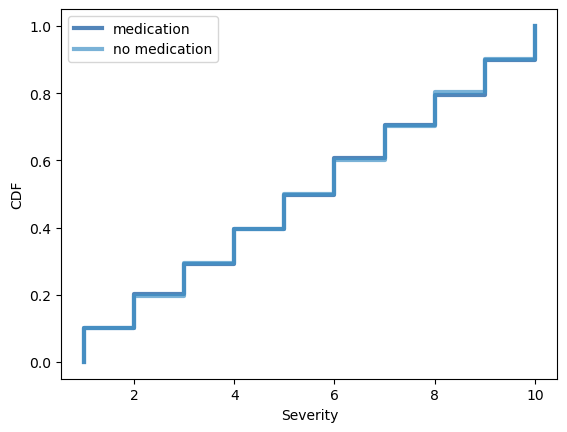

<Figure size 800x600 with 0 Axes>

In [264]:
med_cdf = thinkstats2.Cdf(Meds.Severity, label='medication')
nomed_cdf = thinkstats2.Cdf(NoMeds.Severity, label='no medication')
thinkplot.PrePlot(2)
thinkplot.Cdfs([med_cdf, nomed_cdf])
thinkplot.Show(xlabel='Severity', ylabel='CDF')

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen

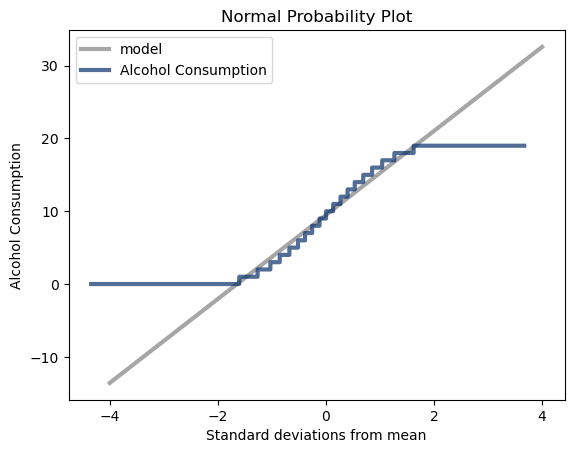

In [268]:
#I am using the normal model

Alcohol_Mean = Alcohol.mean()
Alcohol_STD = Alcohol.std()
xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, inter=Alcohol_Mean, slope=Alcohol_STD)
thinkplot.Plot(fxs, fys, color='gray', label='model')

xs, ys = thinkstats2.NormalProbability(Alcohol)
thinkplot.Plot(xs, ys, label='Alcohol Consumption')
thinkplot.Config(title='Normal Probability Plot', xlabel='Standard deviations from mean', ylabel='Alcohol Consumption')


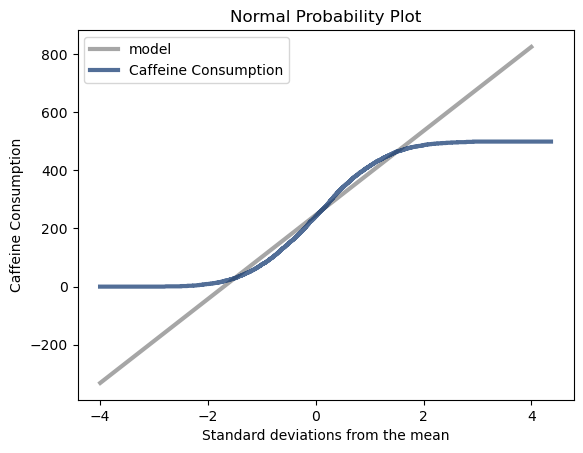

In [270]:
Caffeine_Mean = Caffeine.mean()
Caffeine_STD = Caffeine.std()
xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, inter=Caffeine_Mean, slope=Caffeine_STD)
thinkplot.Plot(fxs, fys, color='gray', label='model')

xs, ys = thinkstats2.NormalProbability(Caffeine)
thinkplot.Plot(xs, ys, label='Caffeine Consumption')
thinkplot.Config(title='Normal Probability Plot', xlabel='Standard deviations from the mean', ylabel='Caffeine Consumption')

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance - For this I want to compare caffeine intake to severity of anxiety. 

In [282]:
#first I make my samples 
sample = thinkstats2.SampleRows(AnxietyFile, 500, replace=False)
Alc_Consumption, Anx_Severity = sample.Alcohol, sample.Severity
print(np.corrcoef(Alc_Consumption, Anx_Severity))

[[1.         0.05218051]
 [0.05218051 1.        ]]


In [292]:
sample = thinkstats2.SampleRows(Meds, 250, replace=False)
MAlc_Consumption, MAnx_Severity = sample.Alcohol, sample.Severity
print(np.corrcoef(MAlc_Consumption, MAnx_Severity))

[[ 1.        -0.0246702]
 [-0.0246702  1.       ]]


In [294]:
sample = thinkstats2.SampleRows(NoMeds, 250, replace=False)
NMAlc_Consumption, NMAnx_Severity = sample.Alcohol, sample.Severity
print(np.corrcoef(NMAlc_Consumption, NMAnx_Severity))

[[ 1.         -0.00710011]
 [-0.00710011  1.        ]]


In [310]:
sample = thinkstats2.SampleRows(AnxietyFile, 500, replace=False)
HRS, SS = sample.HeartRate, sample.Severity
print(np.corrcoef(HRS, SS))

[[1.         0.00970391]
 [0.00970391 1.        ]]


In [342]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Sev_Mean = Severity.mean()
HeartRateMean = HeartRate.mean()
print(Cov(Alc_Consumption, Anx_Severity, meanx=Alcohol_Mean, meany=Sev_Mean))
print(Cov(AnxietyFile.Alcohol, AnxietyFile.Severity, Alcohol_Mean, Sev_Mean))
print(Cov(AnxietyFile.HeartRate, AnxietyFile.Severity, HeartRateMean))

0.5830873333333334
0.15317934722222215
-0.031021958333333145


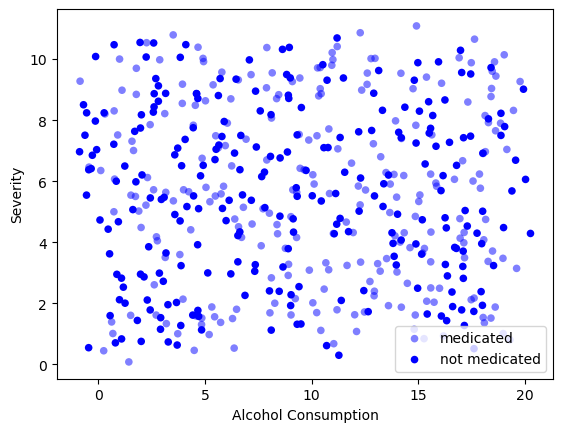

In [336]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
    
JAC = Jitter(Alc_Consumption)
JAS = Jitter(Anx_Severity)
MJAC = Jitter(MAlc_Consumption)
MJAS = Jitter(MAnx_Severity)
NMJAC = Jitter(NMAlc_Consumption)
NMJAS = Jitter(NMAnx_Severity)


thinkplot.Scatter(MJAC, MJAS, alpha=0.5, label='medicated')
thinkplot.Scatter(NMJAC, NMJAS, alpha=1, label='not medicated')
thinkplot.Config(xlabel='Alcohol Consumption', ylabel='Severity')

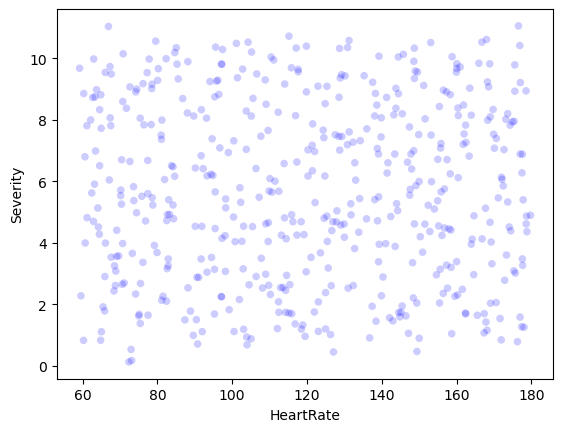

In [316]:
JHRS = Jitter(HRS)
JSS = Jitter(SS)
thinkplot.Scatter(JHRS, JSS)
thinkplot.Config(xlabel='HeartRate', ylabel='Severity')

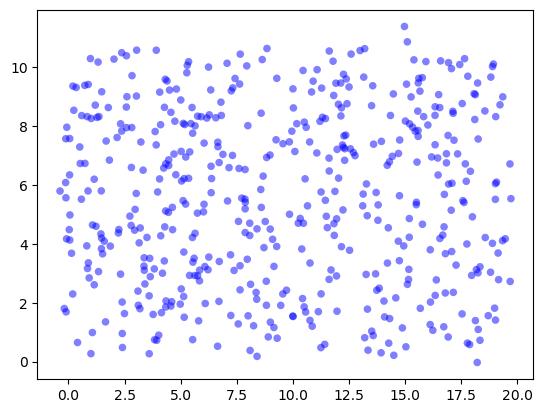

In [130]:
thinkplot.Scatter(JAC, JAS, alpha=0.5)

In [134]:
print(np.corrcoef(HeartRate, Severity))

[[ 1.         -0.02221335]
 [-0.02221335  1.        ]]


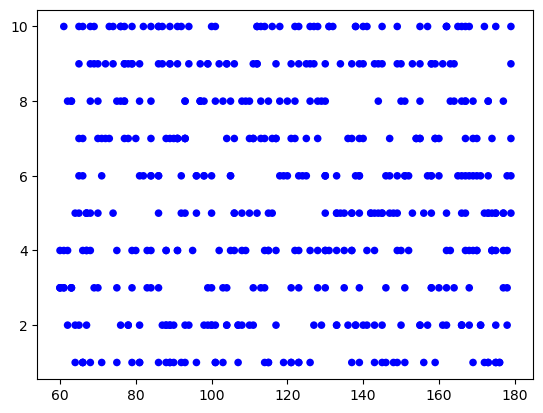

In [138]:
thinkplot.Scatter(HeartRate, Severity, alpha = 1)

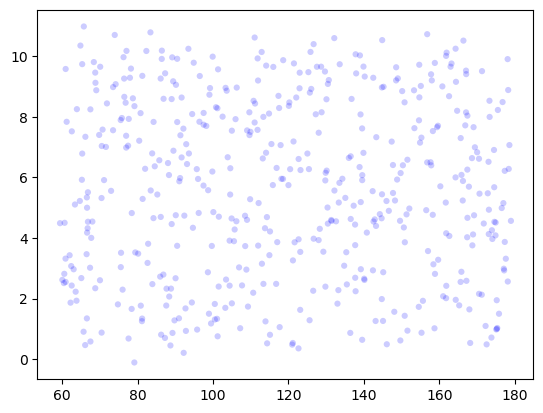

In [146]:
JHR = Jitter(HeartRate)
JS = Jitter(Severity)
thinkplot.Scatter(JHR, JS, alpha=0.2, s=20)

In [156]:
Cov(HeartRate, Severity, meanx=HR_Mean, meany=Sev_Mean)

-2.2625840000000013

This section is for my hypothesis test. 

In [158]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hypothesis.py")

Downloaded hypothesis.py


The first step is to quantify the size of the apparent effect by choosing a test statistic. 
The second step is to define the null hypothesis
The third step is to compute the p-value
The last step is to interpret the result

My original hypothesis was that higher levels of alcohol consumption would result in higher severity in anxiety. For this I will test the the difference in mean between the low severity and high severity. 

In [328]:
LowSevMean = LowSeverity.Alcohol.mean()
HighSevMean = HighSeverity.Alcohol.mean()
HighSevMean - LowSevMean

0.06166999279596119

The second step is to define the null hypothesis which would be that alcohol consumption has no effect on the severity of anxiety. I will use permutation 

In [173]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [175]:
data = LowSeverity.Alcohol.values, HighSeverity.Alcohol.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.57

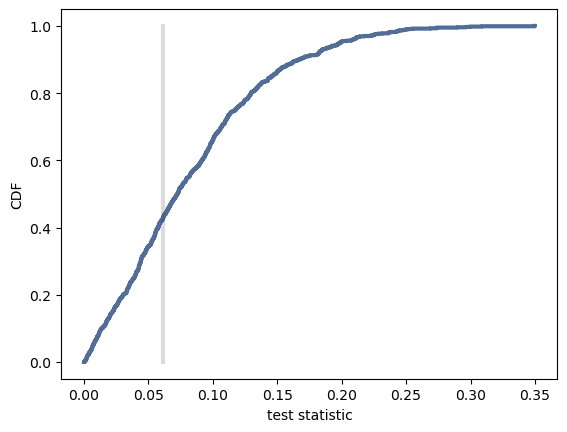

In [177]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic', ylabel='CDF')

This section will be the regression analysis on the dependent variable of Severity and the explanatory variables of sleep, physical activity, alcohol and caffeine.

In [356]:
formula = 'Severity ~ Dizziness + HeartRate + BreathRate + Sweating'
model = smf.ols(formula, data=AnxietyFile)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.341
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.252
Time:                        18:46:03   Log-Likelihood:                -29628.
No. Observations:               12000   AIC:                         5.927e+04
Df Residuals:                   11995   BIC:                         5.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3600      0.138     38.873      0.000       5.090       5.630
Dizziness[T.Yes]     0.1128      0.057      1.979      0.048       0.001       0.224
HeartRate         4.978e-06      0.001      0.007      0.995      -0.001       0.001
BreathRate           0.0024      0.003      0.729      0.466      -0.004       0.009
Sweating             0.0179      0.018      0.969      0.333      -0.018       0.054
==============================================================================
Omnibus:                    10835.491   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.532
Skew:                          -0.008   Prob(JB):                    4.67e-158
Kurtosis:                       1.796   Cond. No.                         672.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
formula = 'Severity ~ Alcohol'
model = smf.ols(formula, data=AnxietyFile)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.035
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.309
Time:                        18:37:55   Log-Likelihood:                -29630.
No. Observations:               12000   AIC:                         5.926e+04
Df Residuals:                   11998   BIC:                         5.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4639      0.050    108.740      0.000       5.365       5.562
Alcohol        0.0046      0.005      1.017      0.309      -0.004       0.013
==============================================================================
Omnibus:                    10978.615   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.200
Skew:                          -0.008   Prob(JB):                    2.03e-158
Kurtosis:                       1.795   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
AnxietyFile['Alcohol2'] = AnxietyFile.Alcohol**2
formula = 'Severity ~ Alcohol + Alcohol2'
model = smf.ols(formula, data=AnxietyFile)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.213
Date:                Sat, 01 Mar 2025   Prob (F-statistic):              0.297
Time:                        20:46:34   Log-Likelihood:                -29630.
No. Observations:               12000   AIC:                         5.927e+04
Df Residuals:                   11997   BIC:                         5.929e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4046      0.071     76.013      0.000       5.265       5.544
Alcohol        0.0243      0.017      1.404      0.160      -0.010       0.058
Alcohol2      -0.0010      0.001     -1.179      0.238      -0.003       0.001
==============================================================================
Omnibus:                    10986.004   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.274
Skew:                          -0.007   Prob(JB):                    1.96e-158
Kurtosis:                       1.795   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
formula = 'Severity ~ Medication'
model = smf.ols(formula, data=AnxietyFile)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 2.798e-05
Date:                Sat, 01 Mar 2025   Prob (F-statistic):              0.996
Time:                        20:32:04   Log-Likelihood:                -29631.
No. Observations:               12000   AIC:                         5.927e+04
Df Residuals:                   11998   BIC:                         5.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5077      0.029    188.814      0.000       5.450       5.565
Medication[T.Yes]    -0.0003      0.065     -0.005      0.996      -0.128       0.128
==============================================================================
Omnibus:                    10971.083   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.123
Skew:                          -0.008   Prob(JB):                    2.11e-158
Kurtosis:                       1.795   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
formula = 'Severity ~ Alcohol + Medication + PhysicalActivity'
model = smf.ols(formula, data=AnxietyFile)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.647
Date:                Sat, 01 Mar 2025   Prob (F-statistic):              0.176
Time:                        20:33:13   Log-Likelihood:                -29629.
No. Observations:               12000   AIC:                         5.927e+04
Df Residuals:                   11996   BIC:                         5.929e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.3742      0.069     77.935      0.000       5.239       5.509
Medication[T.Yes]    -0.0015      0.065     -0.023      0.982      -0.129       0.126
Alcohol               0.0046      0.005      1.023      0.306      -0.004       0.013
PhysicalActivity      0.0178      0.009      1.976      0.048       0.000       0.036
==============================================================================
Omnibus:                    10893.575   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.217
Skew:                          -0.008   Prob(JB):                    3.32e-158
Kurtosis:                       1.796   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""